## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
unique_users = df.nunique()['user_id']
print(unique_users)

290584


d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
first_group = df.query("group == 'treatment' and landing_page == 'old_page'")
print(format(len(first_group)))

second_group = df.query("group == 'control' and landing_page == 'new_page'")
print(format(len(second_group)))

sum_group = format(len(second_group) + (len(first_group)))
print(sum_group)

1965
1928
3893


> Number of times 'treatment' and 'new_page' don't line up: 3893.

f. Do any of the rows have missing values?

In [7]:
df.isnull().values.any()

False

 > No, we don't have any rows with missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

> By using the drop function, we just got rid of the the rows which don't line up. We are going to check if that worked by calling the df.info() function again.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


Store everything in a new csv.

In [10]:
df.to_csv('ab_new.csv', index = False)

> Call the newly created CSV and store it in a new dataframe called df2. Then we are going to use the .head() function to take a look at our newly created dataframe.

In [11]:
df2 = pd.read_csv('ab_new.csv')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Checking the shape next. 

In [12]:
df2.shape

(290585, 5)

> Next, we are going to check if the rows, which weren't lining up, have been removed correctly. 

In [13]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

> As we get 0 as a result, we can be sure that the rows have been removed completely, which is good.

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

> First, let's have a look at the dataframe first in order to see which column we have to use for counting.

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [15]:
unique_user_count = df2.count()['user_id']
print(unique_user_count)

290585


> By using the count function we just confirm how many entries we have in user_id column. Next, we are going to check how many unique users we have by using the .unique() and the .duplicated() function.

In [16]:
len(df2['user_id'].unique())

290584

In [17]:
sum(df2['user_id'].duplicated())

1

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [19]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
df2.drop(labels=1876, axis=0, inplace=True)

> Deciding that we are going to drop the first row, we target it's row number with label and drop it. By using the inplace function, we 'save' the change to our current dataframe df2.

> Let's check if the drop worked.

In [21]:
sum(df2['user_id'].duplicated())

0

> Yes it did. There are no duplicated rows anymore in our user_id column.

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

> The probability can be found out by calculating the mean of the column that we wan't to calculate our probability for, in this case 'converted'.

In [23]:
df2['converted'].mean()

0.11959708724499628

The probability of an individual converting, regardless of the page it receives is: 0.11959.

b. Given that an individual was in the `control` group, what is the probability they converted?

> In order to calculate the probability, we have to group our data by 'group'. After that, we can have a look at the mean, which is the probability we are looking for.

In [24]:
df2_groups = df.groupby('group')
df2_groups.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145311.0  0.118807  0.323563  0.0  0.0  0.0  0.0  1.0  145311.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788164.072594  91287.914601  630002.0  709279.5  788128.5   
treatment  787845.618446  91161.258854  630000.0  708746.5  787874.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.50  945999.0

> Given that the individual was in the control group, the probability it converted is: 0.120386. You can also calculate the mean by using a different function, which is the one below:

In [25]:
df2[df2['group']=='control']['converted'].mean()

0.1203863045004612

> Using this function, we get more numbers after the full stop like when we are using the describe() function.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

> We are going to use the same functions as above.

In [26]:
df2_groups = df.groupby('group')
df2_groups.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145311.0  0.118807  0.323563  0.0  0.0  0.0  0.0  1.0  145311.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788164.072594  91287.914601  630002.0  709279.5  788128.5   
treatment  787845.618446  91161.258854  630000.0  708746.5  787874.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.50  945999.0

> Given that the individual was in the treatment group, the probability it converted is: 0.118807. You can also calculate the mean by using a different function, which is the one below:

In [27]:
df2[df2['group']=='treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [28]:
new_pages = len(df.query("landing_page == 'new_page'"))
all_pages = df2.shape[0]
probability_new_pages = new_pages/all_pages
print(probability_new_pages)

0.5000653855683727


> The probability, that an individual received the new page is: 0.5000653855683727

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

> Let's sum it up first:
- If an individual has been in the control group, the probability they converted is 0.120386.
- If an individual has been in the treatment group, the probability they converted is 0.118807.
- Taking a look at the numbers, it looks like that the old page converted better, but the difference is a very small one:

In [29]:
df2[df2['group']=='control']['converted'].mean() - df2[df2['group']=='treatment']['converted'].mean()

0.0015782389853555567

> - As the probability, that an individual received the new page is almost exactly 0.5 and as it looks like there is only a very, very small difference in conversions, we can't really tell which page performed better at this time. 
- Most likely, the test span duration will have to be changed, so that we have a bigger set of data.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Hypothesis
$H_{0}$ : $p_{old}$ >=  $p_{new}$

Null-Hypothesis. This hpyothesis states that the control performance better or equal than the treatment.

$H_{1}$ : $p_{old}$ <  $p_{new}$

This hypothesis states that the control performance lower that the treatment one.

##### You can also write it this way:
$H_{0}$ : $p_{new}$ <= $p_{old}$

This is the Null-Hypothesis again. It states, that the treatment page performs wores or equal to the control.

$H_{1}$ : $p_{new}$ > $p_{old}$

This is the Null-Hypothesis again. It states, that the treatment page performs better than the control.

#### Alternative-hypothesis

$H_1: p_{new} - p_{old} > 0$

> This is an additional way to describe the hypotheses H1 written above. Written this way the hypothesis states, that the result of $p_{new}$ minus $p_{old}$ is bigger than zero.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

> Given what is stated below 2. (above), we should calculate the probability of conversion given new page and old page respectively. As we assume $p_{new} = p_{old}$, we can just calculate the mean for the entire column in order to get the convert rate.

In [30]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


> The convert rate of $p_{new}$ under the null is: 0.11959708724499628.

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

> We are doing just the same as we did above.

In [31]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


> The convert rate of $p_{old}$ under the null is: 0.11959708724499628. This is what we expected, given the assumption above ($p_{new} = p_{old}$).

> First, calculate the probability of conversion for new page

> Second, calculate the probability of conversion for old page

> Third, sum up the to probabilities and take the mean

> The result will be exactly the same as the convert rates we calculated above.

c. What is $n_{new}$?

$_{new}$ and $n_{old}$ are the number of tests. In order to get these numbers for the treatment (new) and control (old), we are going to use the len function and query the results in the group column.

In [32]:
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


$n _{new}$, the number of tests for the treatment, is: 145310.

d. What is $n_{old}$?

In [33]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


$n _{old}$, the number of tests for the control, is: 145274.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [34]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
print(new_page_converted)

[0 0 0 ... 0 0 0]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [35]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
print(new_page_converted)

[0 0 0 ... 0 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [36]:
new_page_converted = new_page_converted[:145274]

In [37]:
p_new_p_old = (new_page_converted/n_new) - (old_page_converted/n_old)

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [38]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

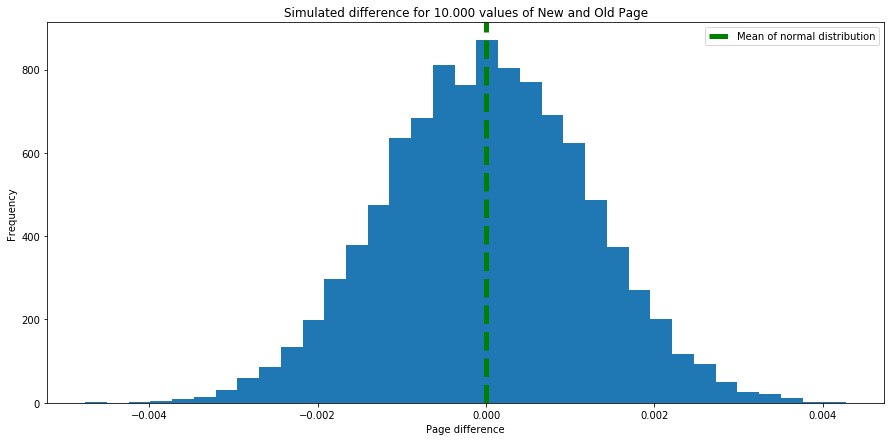

In [39]:
plt.figure(figsize=(15,7))
plt.hist(p_diffs, bins=35)
plt.title('Simulated difference for 10.000 values of New and Old Page')
plt.axvline(x=(p_new_p_old.all()), color='g', linestyle='dashed', linewidth=5, label="Mean of normal distribution")
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Yes, the plot looks like i expected. This plot shows a normal distribution, which you can recognize by not being skewed to either side. If we plot the mean for the normal distribution as well, we can see it is 0, which is exactly what it should be for our under the null hypothesis.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [40]:
actual_difference = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
actual_difference

-0.0015790565976871451

In [41]:
p_diffs = np.array(p_diffs)
p_diffs

array([ 0.0001081 , -0.00197057, -0.00032556, ..., -0.00097939,
        0.00177371, -0.00031174])

In [42]:
(actual_difference < p_diffs).mean()

0.906

In [43]:
print('Proportion as percentage: {}%'.format((actual_difference < p_diffs).mean()*100))

Proportion as percentage: 90.60000000000001%


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> In part j, i computed p-values, also called probability value, 

> According to the lectures in Udacity and Sources like (https://en.wikipedia.org/wiki/P-value) this is the probabilty for our statistical model if the null hypothesis is true.

> This value shows us that there is no advantage for the new version of the page (treatment) in comparison to the control. In fact, the control is performing slightly better than the treatment. Additionally, this shows us that this sample conforms with our null hypothesis, because we just saw that $p_{old}$ is in fact bigger than $p_{new}$, hence confirming $H_{0}$ : $p_{old}$ >=  $p_{new}$.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [44]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

print('convert_old:', convert_old)
print('convert_new:', convert_new)
print('n_old:', n_old)
print('n_new:', n_new)

convert_old: 17489
convert_new: 17264
n_old: 145274
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [75]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old],[n_new, n_old], alternative='larger')
print("z-score:", z_score)
print("p-value:", p_value)

z-score: -1.3109241984234394
p-value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [76]:
from scipy.stats import norm

print('Significance of z-score:',norm.cdf(z_score))
print('Critical value:',norm.ppf(1-(0.05)/2))

Significance of z-score: 0.09494168724097551
Critical value: 1.959963984540054


**My answer:**

> By using the above calculation, we can now see that the z-score is less than the critical value. So we can conclude that the null hypothesis is correct, so we accept it.
> Additionally, this agrees with our findings in j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [77]:
df2['intercept'] = pd.Series(np.zeros(len(df2)), index=df2.index)
df2['ab_page'] = pd.Series(np.zeros(len(df2)), index=df2.index)
df2.head()

,user_id,timestamp,group,landing_page,ab_page,intercept,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0,0.0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0,0.0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0,0.0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0,0.0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,0.0,0.0,1


In [78]:
change_treatment = df2[df2['group']=='treatment'].index

df2.set_value(index=change_treatment, col='ab_page', value=1)
df2.set_value(index=df2.index, col='intercept', value=1)
df2[['intercept', 'ab_page']] = df2[['intercept', 'ab_page']].astype(int)
df2 = df2[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

df2.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,user_id,timestamp,group,landing_page,ab_page,intercept,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [79]:
import statsmodels.api as sm
logistic_r = sm.Logit(df2['converted'],df2[['ab_page','intercept']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [80]:
model_summary = logistic_r.fit()
model_summary.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Sep 2018   Pseudo R-squ.:               8.077e-06
Time:                        09:17:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> Taking a look at the logit regression model / results, we can see that the p-value for the ab-page is 0.190. Before we are able to compare this result with our result in Part II, we need to take a further step, as the value of 0.190 is the result for a two-tailed test. As we need the result for a one-tailed test, we apply the following function:

In [81]:
1-0.190/2

0.905

Now we have the p-value for the one-tailed test, which is the same value like we got in Part II (rounded).

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other factors to consider**

> An other factor which we could consider for our regression model could be the time of visit. It would be important to see the spread on hours of day, but also on days of week and if there the convert rates might be connected to it.

> For example, you could group the data in days of week (Monday to Sunday), hours of day (1-24) or time slots like Morning, Afternoon, Evening and Night and have a look at the convert rate.

> However, adding more terms to our regression model will definitly make it more complex, not only in regards of computing, but also analyzing. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [68]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [69]:
df3 = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,ab_page,intercept,converted
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,1,1,0


In [70]:
df3.shape

(290584, 7)

In [71]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 7 columns):
country         290584 non-null object
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
ab_page         290584 non-null int64
intercept       290584 non-null int64
converted       290584 non-null int64
dtypes: int64(3), object(4)
memory usage: 17.7+ MB


In [72]:
df3['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [73]:
### Create the necessary dummy variables
df3[['US','UK','CA']] = pd.get_dummies(df3['country'])[['US','UK','CA']]
df3['country'].astype(str).value_counts()
df3.head()

,country,timestamp,group,landing_page,ab_page,intercept,converted,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,1,1,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,1,1,0,0,1,0


In [74]:
df3['intercept'] = 1
logit_regression_model = sm.Logit(df3['converted'], df3[['US','UK','CA']])
model_results = logit_regression_model.fit()
model_results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 07 Sep 2018   Pseudo R-squ.:               1.521e-05
Time:                        09:15:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK            -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

> Taking a look at this regression model, we can conclude that there is no big difference between the available countries. This is similar to the results we got for the model for ab_page, where we also didn't have a substantial difference. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
logit_regression_model_2 = sm.Logit(df3['converted'],df3[['ab_page','intercept', 'UK', 'US']])

model_results_2 = logit_regression_model_2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [59]:
model_results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 07 Sep 2018   Pseudo R-squ.:               2.323e-05
Time:                        09:00:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

> At this point, we can already tell that th coefficent for the ab_page is different to the UK and US one. But in order to see the interation between the page and the country, we have to take an additional step and combine the data for pages with the data for the countries.

In [60]:
df3['ab_page_uk'] = df3['ab_page']* df3['UK']
df3['ab_page_us'] = df3['ab_page']* df3['US']
df3.head()

,country,timestamp,group,landing_page,ab_page,intercept,converted,US,UK,CA,ab_page_uk,ab_page_us
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,1,1,0,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,1,1,0,0,1,0,1,0


In [61]:
logit_regression_model_3 = sm.Logit(df3['converted'], df3[['intercept','ab_page','ab_page_uk','ab_page_us','UK','US']])
model_results_3 = logit_regression_model_3.fit()
model_results_3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 07 Sep 2018   Pseudo R-squ.:               3.482e-05
Time:                        09:00:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
ab_page_uk     0.0783      0.057      1.378      0.168      -0.033       0.190
ab_page_us     0.0469      0.054      0.872      0.383      -0.059       0.152
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
==============================================================================
"""

Again, the p-value listed in this result is for a two-tailed test. In order get the ones for a one tailed test, we apply the following:

In [84]:
1-0.168/2

0.916

In [85]:
1-0.383/2

0.8085

In [86]:
1-0.767/2

0.6165

In [87]:
1-0.642/2

0.679

<a id='conclusions'></a>
## Conclusions

> 1. Taking a look at the p-values shown in the results above, they are all bigger than 0.05, except the one for intercept. This means that only the value for the intercept indicates a strong evidence against the null hypothesis, therefore rejecting it. For the other ones, the p-value indicates a weak evidence against the null hyothesis, therefore they fail to reject the null hypothesis. So we accept it. This confirms the results we have drawn before.

> 2. After combining the data, we can now see that the coefficent (coef) for the ab_page_uk and ab_page_us is different to the ab_page. 

> 3. As there seems to be no big difference in convert rates for the countries. Using the models above we can also see that the country a user lives in (US, UK or CA) does not have a significant impact on the convert rate.

> 4. We know that the treatment and control have been delivered almost equally to the users. Now having no big difference whatsoever would lead me to the following recommendation for the e-commerce company:

**Recommendation**

> Taking into account that we only can operate with the information we have and that we didn't take a look at more terms to the model (such as the time of visit), i only can make a recommendation on the results we have. The results we have leads me to the recommendation that the e-commerce company should create testing scenarios which are more significant in terms of changes done to their websites. 


Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.